In [99]:
# Change the cols from pima-indians-diabetes.csv to 
# Number_of_times_pregnant,Plasma_glucose_concentration,Diastolic_blood_pressure,Triceps_skin_fold_thickness,Serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,Class_variable

In [ ]:
# Decision Tree 
import pandas as pd

data = pd.read_csv('./Datasets/pima-indians-diabetes.csv')
data.head()

,Number_of_times_pregnant,Plasma_glucose_concentration,Diastolic_blood_pressure,Triceps_skin_fold_thickness,Serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,Class_variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [101]:
# Checking if all are numeric types
data.dtypes

Number_of_times_pregnant          int64
Plasma_glucose_concentration      int64
Diastolic_blood_pressure          int64
Triceps_skin_fold_thickness       int64
Serum_insulin                     int64
Body_mass_index                 float64
Diabetes_pedigree_function      float64
Age                               int64
Class_variable                    int64
dtype: object

In [102]:
# Fill NaN with mean of that col
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())

In [103]:
# Split the data

X = data.drop('Class_variable', axis=1)
y = data['Class_variable']

In [104]:
# Split data in train and test then apply DesicionTreeModel
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)
# max_depth = 5 to avoid overfitting
# If need all branches , remove max_depth
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [105]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, y_pred))
print("Classification Report : ",classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy :  0.7024390243902439
Classification Report :                precision    recall  f1-score   support

           0       0.74      0.84      0.79       405
           1       0.59      0.43      0.50       210

    accuracy                           0.70       615
   macro avg       0.66      0.64      0.64       615
weighted avg       0.69      0.70      0.69       615

Confusion Matrix:
 [[341  64]
 [119  91]]


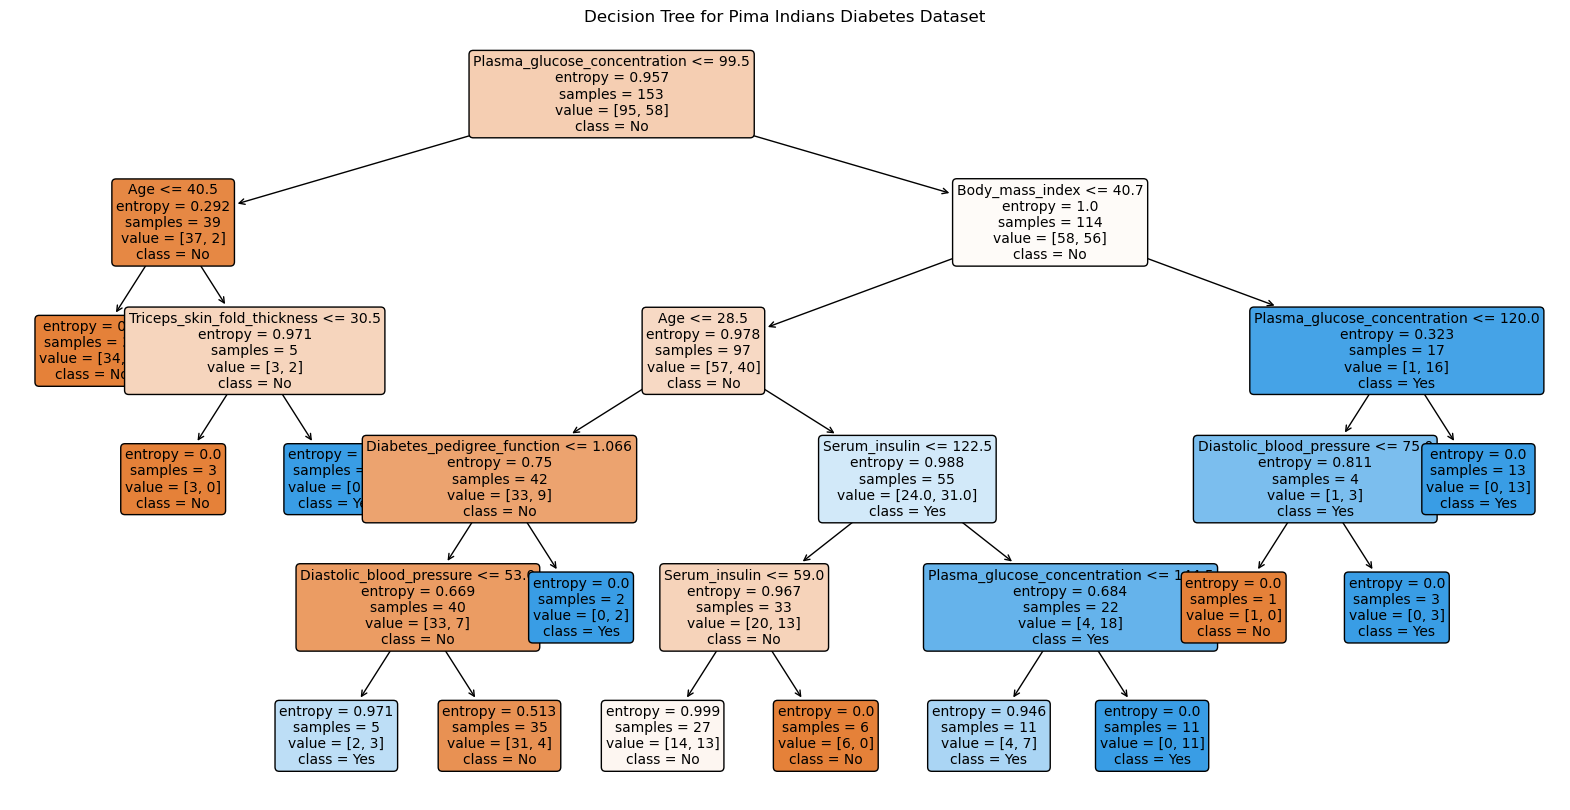

In [106]:
# Plot the decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No','Yes'], rounded=True, filled=True, fontsize=10)
plt.title("Decision Tree for Pima Indians Diabetes Dataset")
plt.show()

In [107]:
# Test the decision tree on a random sample from the test set
import random
random_index = random.randint(0, len(X_test) - 1)
random_sample = X_test.iloc[random_index:random_index+1]
random_pred = model.predict(random_sample)
print(f"Random Sample Prediction: {random_pred[0]}")
print("Actual Value:", y_test.iloc[random_index])

Random Sample Prediction: 0
Actual Value: 1
